In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The size of the lattice for y direction!
L = 2**5

In [3]:
# Define the vectors
a = 1.

d1 = a*np.array([np.cos(np.pi/6), - np.sin(np.pi/6), 0])
d2 = a*np.array([0, 1, 0])
d3 = a*np.array([-np.cos(np.pi/6), - np.sin(np.pi/6), 0])

In [4]:
# Define the matrices

# Pauli matrices

Sx = np.zeros((2,2), dtype ='complex')
Sx[0][0] = 0.
Sx[0][1] = 1.
Sx[1][0] = 1.
Sx[1][1] = 0.

Sy = np.zeros((2,2), dtype ='complex')
Sy[0][0] = 0.
Sy[0][1] = -1j
Sy[1][0] = 1j
Sy[1][1] = 0.

Sz = np.zeros((2,2), dtype ='complex')
Sz[0][0] = 1.
Sz[0][1] = 0.
Sz[1][0] = 0.
Sz[1][1] = -1.

E = np.zeros((2,2), dtype ='complex')
E[0][0] = 1.
E[0][1] = 0.
E[1][0] = 0.
E[1][1] = 1.

In [5]:
Sx,Sy,Sz,E

(array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]),
 array([[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]),
 array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]),
 array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))

In [6]:
# Define the matrix

# <i_y| H |i_y>
def H_0(ka, t, p_SO,p_Rashba, p_zigzag):
    
    M = np.zeros((4,4), dtype ='complex')
    
    # H^0_AA
    M[0][0] = 1j*Sz[0][0]*p_SO*(2*1j)*np.sin(ka) + E[0][0]*p_zigzag 
    M[0][1] = 1j*Sz[0][1]*p_SO*(2*1j)*np.sin(ka) + E[0][1]*p_zigzag 
    M[1][0] = np.conjugate(M[0][1]) 
    M[1][1] = 1j*Sz[1][1]*p_SO*(2*1j)*np.sin(ka) + E[1][1]*p_zigzag 
    
    # H^0_BB
    M[2][2] = -1j*Sz[0][0]*p_SO*(2*1j)*np.sin(ka) - E[0][0]*p_zigzag 
    M[2][3] = -1j*Sz[0][1]*p_SO*(2*1j)*np.sin(ka) - E[0][1]*p_zigzag 
    M[3][2] = np.conjugate(M[2][3])
    M[3][3] = -1j*Sz[1][1]*p_SO*(2*1j)*np.sin(ka) - E[1][1]*p_zigzag
    
    #H^0_AB
    M[0][2] = E[0][0]*t - 1j*p_Rashba*(Sx[0][0]*d2[1]-Sy[0][0]*d2[0])
    M[0][3] = E[0][1]*t - 1j*p_Rashba*(Sx[0][1]*d2[1]-Sy[0][1]*d2[0])
    M[1][2] = E[1][0]*t - 1j*p_Rashba*(Sx[1][0]*d2[1]-Sy[1][0]*d2[0])
    M[1][3] = E[1][1]*t - 1j*p_Rashba*(Sx[1][1]*d2[1]-Sy[1][1]*d2[0])
    
    #H^0_BA
    M[2][0] = np.conjugate(M[0][2]) 
    M[2][1] = np.conjugate(M[1][2])
    M[3][0] = np.conjugate(M[0][3])
    M[3][1] = np.conjugate(M[1][3])
    
    return M

In [7]:
# <i_y| H |i_y -1>
def H_negative1(ka, t, p_SO,p_Rashba, p_zigzag):
    
    M = np.zeros((4,4), dtype ='complex')
    
    # H^-1_AA
    M[0][0] = 1j*Sz[0][0]*p_SO*(1- np.exp(1j*ka))
    M[0][1] = 1j*Sz[0][1]*p_SO*(1- np.exp(1j*ka))
    M[1][0] = 1j*Sz[1][0]*p_SO*(1- np.exp(1j*ka))
    M[1][1] = 1j*Sz[1][1]*p_SO*(1- np.exp(1j*ka))
    
    # H^-1_BB
    M[2][2] = -1j*Sz[0][0]*p_SO*(1- np.exp(1j*ka))
    M[2][3] = -1j*Sz[0][1]*p_SO*(1- np.exp(1j*ka))
    M[3][2] = -1j*Sz[1][0]*p_SO*(1- np.exp(1j*ka))
    M[3][3] = -1j*Sz[1][1]*p_SO*(1- np.exp(1j*ka))
    
    #H^-1_AB
    M[0][2] = 0.
    M[0][3] = 0.
    M[1][2] = 0.
    M[1][3] = 0.
    
    #H^-1_BA
    M[2][0] = E[0][0]*t*(1+np.exp(1j*ka)) + 1j*p_Rashba*( (Sx[0][0]*d1[1]-Sy[0][0]*d1[0]) + np.exp(1j*ka)*(Sx[0][0]*d3[1]-Sy[0][0]*d3[0]) )
    M[2][1] = E[0][1]*t*(1+np.exp(1j*ka)) + 1j*p_Rashba*( (Sx[0][1]*d1[1]-Sy[0][1]*d1[0]) + np.exp(1j*ka)*(Sx[0][1]*d3[1]-Sy[0][1]*d3[0]) )
    M[3][0] = E[1][0]*t*(1+np.exp(1j*ka)) + 1j*p_Rashba*( (Sx[1][0]*d1[1]-Sy[1][0]*d1[0]) + np.exp(1j*ka)*(Sx[1][0]*d3[1]-Sy[1][0]*d3[0]) )
    M[3][1] = E[1][1]*t*(1+np.exp(1j*ka)) + 1j*p_Rashba*( (Sx[1][1]*d1[1]-Sy[1][1]*d1[0]) + np.exp(1j*ka)*(Sx[1][1]*d3[1]-Sy[1][1]*d3[0]) )
    
    return M

In [8]:
# <i_y| H |i_y +1>
def H_positive1(ka, t, p_SO,p_Rashba, p_zigzag):
    
    M = np.zeros((4,4), dtype ='complex')
    
    # H^+1_AA
    M[0][0] = -1j*Sz[0][0]*p_SO*(1- np.exp(-1j*ka))
    M[0][1] = -1j*Sz[0][1]*p_SO*(1- np.exp(-1j*ka))
    M[1][0] = -1j*Sz[1][0]*p_SO*(1- np.exp(-1j*ka))
    M[1][1] = -1j*Sz[1][1]*p_SO*(1- np.exp(-1j*ka))
    
    # H^+1_BB
    M[2][2] = 1j*Sz[0][0]*p_SO*(1- np.exp(-1j*ka))
    M[2][3] = 1j*Sz[0][1]*p_SO*(1- np.exp(-1j*ka))
    M[3][2] = 1j*Sz[1][0]*p_SO*(1- np.exp(-1j*ka))
    M[3][3] = 1j*Sz[1][1]*p_SO*(1- np.exp(-1j*ka))
    
    #H^+1_AB
    M[0][2] = E[0][0]*t*(1+np.exp(-1j*ka)) - 1j*p_Rashba*( (Sx[0][0]*d1[1]-Sy[0][0]*d1[0]) + np.exp(-1j*ka)*(Sx[0][0]*d3[1]-Sy[0][0]*d3[0]) )
    M[0][3] = E[0][1]*t*(1+np.exp(-1j*ka)) - 1j*p_Rashba*( (Sx[0][1]*d1[1]-Sy[0][1]*d1[0]) + np.exp(-1j*ka)*(Sx[0][1]*d3[1]-Sy[0][1]*d3[0]) )
    M[1][2] = E[1][0]*t*(1+np.exp(-1j*ka)) - 1j*p_Rashba*( (Sx[1][0]*d1[1]-Sy[1][0]*d1[0]) + np.exp(-1j*ka)*(Sx[1][0]*d3[1]-Sy[1][0]*d3[0]) )
    M[1][3] = E[1][1]*t*(1+np.exp(-1j*ka)) - 1j*p_Rashba*( (Sx[1][1]*d1[1]-Sy[1][1]*d1[0]) + np.exp(-1j*ka)*(Sx[1][1]*d3[1]-Sy[1][1]*d3[0]) )
    
    #H^+1_BA
    M[2][0] = 0.
    M[2][1] = 0.
    M[3][0] = 0.
    M[3][1] = 0.
    
    return M

In [9]:
# Define Hamiltonian(kx)
def Hamiltonian(ka, t, p_SO,p_Rashba, p_zigzag):
    
    M = np.zeros((int(4*L),int(4*L)), dtype ='complex')
    
    HM_0 = H_0(ka, t,p_SO,p_Rashba,p_zigzag)
    HM_negative1 = H_negative1(ka,t,p_SO,p_Rashba,p_zigzag)
    HM_positive1 = H_positive1(ka,t,p_SO,p_Rashba,p_zigzag)
    
    # Placing <i_y| H |i_y>
    for i in range(L):
        M[int(4*i)][int(4*i)]                    = HM_0[0][0]
        M[int(4*i)][int(4*i) + 1]             = HM_0[0][1]
        M[int(4*i)][int(4*i) + 2]             = HM_0[0][2]
        M[int(4*i)][int(4*i) + 3]             = HM_0[0][3]
        
        M[int(4*i) + 1][int(4*i)]             = HM_0[1][0]
        M[int(4*i) + 1][int(4*i) + 1]      = HM_0[1][1]
        M[int(4*i) + 1][int(4*i) + 2]      = HM_0[1][2]
        M[int(4*i) + 1][int(4*i) + 3]      = HM_0[1][3]
        
        M[int(4*i) + 2][int(4*i)]             = HM_0[2][0]
        M[int(4*i) + 2][int(4*i) + 1]      = HM_0[2][1]
        M[int(4*i) + 2][int(4*i) + 2]      = HM_0[2][2]
        M[int(4*i) + 2][int(4*i) + 3]      = HM_0[2][3]
        
        M[int(4*i) + 3][int(4*i)]             = HM_0[3][0]
        M[int(4*i) + 3][int(4*i) + 1]      = HM_0[3][1]
        M[int(4*i) + 3][int(4*i) + 2]      = HM_0[3][2]
        M[int(4*i) + 3][int(4*i) + 3]      = HM_0[3][3]
        
    # Placing <i_y| H |i_y-1>
    for i in range(1,L):
        M[int(4*i)][int(4*(i-1))]                    = HM_negative1[0][0]
        M[int(4*i)][int(4*(i-1)) + 1]             = HM_negative1[0][1]
        M[int(4*i)][int(4*(i-1)) + 2]             = HM_negative1[0][2]
        M[int(4*i)][int(4*(i-1)) + 3]             = HM_negative1[0][3]
        
        M[int(4*i) + 1][int(4*(i-1))]             = HM_negative1[1][0]
        M[int(4*i) + 1][int(4*(i-1)) + 1]      = HM_negative1[1][1]
        M[int(4*i) + 1][int(4*(i-1)) + 2]      = HM_negative1[1][2]
        M[int(4*i) + 1][int(4*(i-1)) + 3]      = HM_negative1[1][3]
        
        M[int(4*i) + 2][int(4*(i-1))]             = HM_negative1[2][0]
        M[int(4*i) + 2][int(4*(i-1)) + 1]      = HM_negative1[2][1]
        M[int(4*i) + 2][int(4*(i-1)) + 2]      = HM_negative1[2][2]
        M[int(4*i) + 2][int(4*(i-1)) + 3]      = HM_negative1[2][3]
        
        M[int(4*i) + 3][int(4*(i-1))]             = HM_negative1[3][0]
        M[int(4*i) + 3][int(4*(i-1)) + 1]      = HM_negative1[3][1]
        M[int(4*i) + 3][int(4*(i-1)) + 2]      = HM_negative1[3][2]
        M[int(4*i) + 3][int(4*(i-1)) + 3]      = HM_negative1[3][3]
        
    # Placing <i_y| H |i_y +1>
    for i in range(0,L-1):
        M[int(4*i)][int(4*(i+1))]                    = HM_positive1[0][0]
        M[int(4*i)][int(4*(i+1)) + 1]             = HM_positive1[0][1]
        M[int(4*i)][int(4*(i+1)) + 2]             = HM_positive1[0][2]
        M[int(4*i)][int(4*(i+1)) + 3]             = HM_positive1[0][3]
        
        M[int(4*i) + 1][int(4*(i+1))]             = HM_positive1[1][0]
        M[int(4*i) + 1][int(4*(i+1)) + 1]      = HM_positive1[1][1]
        M[int(4*i) + 1][int(4*(i+1)) + 2]      = HM_positive1[1][2]
        M[int(4*i) + 1][int(4*(i+1)) + 3]      = HM_positive1[1][3]
        
        M[int(4*i) + 2][int(4*(i+1))]             = HM_positive1[2][0]
        M[int(4*i) + 2][int(4*(i+1)) + 1]      = HM_positive1[2][1]
        M[int(4*i) + 2][int(4*(i+1)) + 2]      = HM_positive1[2][2]
        M[int(4*i) + 2][int(4*(i+1)) + 3]      = HM_positive1[2][3]
        
        M[int(4*i) + 3][int(4*(i+1))]             = HM_positive1[3][0]
        M[int(4*i) + 3][int(4*(i+1)) + 1]      = HM_positive1[3][1]
        M[int(4*i) + 3][int(4*(i+1)) + 2]      = HM_positive1[3][2]
        M[int(4*i) + 3][int(4*(i+1)) + 3]      = HM_positive1[3][3]
        
    return M

In [10]:
# Path in kx space.
mesh = int(2**12)
kpath =np.linspace(-np.pi, np.pi, mesh)
kpath

array([-3.14159265, -3.1400583 , -3.13852394, ...,  3.13852394,
        3.1400583 ,  3.14159265])

In [11]:
plot_kpath = np.arange(1, mesh+1,)
plot_kpath

array([   1,    2,    3, ..., 4094, 4095, 4096])

In [12]:
# paramter set1(conducting)
t = 1.
p_SO = 0.06*t
p_Rashba = 0.05*t
p_zigzag = 0.1*t

In [13]:
band = []
for ka in (kpath):
    Matrix = Hamiltonian(ka,t,p_SO,p_Rashba,p_zigzag)
    eigen = np.linalg.eigvalsh(Matrix)
    band.append(eigen)
    
bandT = np.transpose(band)

In [14]:
bandT

array([[-1.13408499, -1.13547653, -1.13686844, ..., -1.13686844,
        -1.13547653, -1.13408499],
       [-1.13408499, -1.1334985 , -1.13487468, ..., -1.13487468,
        -1.1334985 , -1.13408499],
       [-1.13212273, -1.13269381, -1.13158638, ..., -1.13158638,
        -1.13269381, -1.13212273],
       ...,
       [ 1.11002914,  1.11023393,  1.11012036, ...,  1.11012036,
         1.11023393,  1.11002914],
       [ 1.11168786,  1.11146743,  1.11290597, ...,  1.11290597,
         1.11146743,  1.11168786],
       [ 1.11168786,  1.113142  ,  1.11459635, ...,  1.11459635,
         1.113142  ,  1.11168786]])

In [15]:
#band

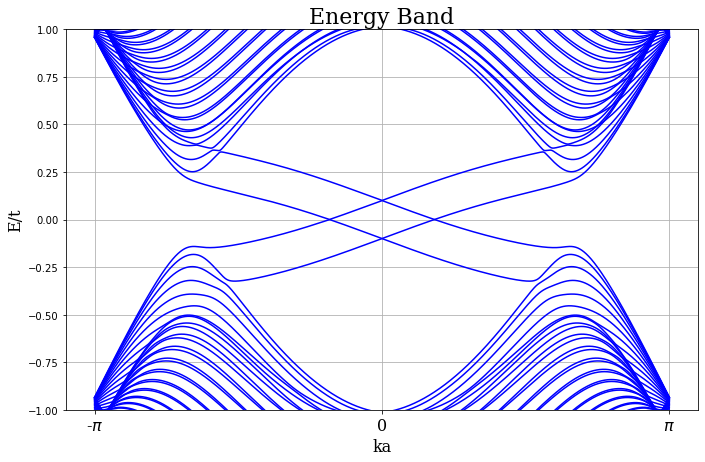

In [16]:
gr = (1+ np.sqrt(5))/2
# Make a plot of the energy band.
fig1 = plt.figure(figsize = (7*gr,7))
ax = fig1.gca()

for i in range(int(4*L)):
    ax.plot(plot_kpath, bandT[i], color="blue") 

ax.set_title("Energy Band", fontfamily = "serif", fontsize = 22)
ax.set_xlabel( "ka", fontfamily = "serif", fontsize = 16)
ax.set_ylabel("E/t", fontfamily = "serif", fontsize = 16)

ticks = [r"-$\pi$", r"0", r"$\pi$"]
ax.set_xticks([0, int(mesh/2), mesh])
ax.set_xticklabels(ticks, fontfamily = "serif", fontsize = 16)
ax.set_ylim(-1,1)
ax.grid(True)

In [17]:
# paramter set2(insulating)
t = 1.
p_SO = 0.06*t
p_Rashba = 0.05*t
p_zigzag = 0.4*t

In [18]:
band = []
for ka in (kpath):
    Matrix = Hamiltonian(ka,t,p_SO,p_Rashba,p_zigzag)
    eigen = np.linalg.eigvalsh(Matrix)
    band.append(eigen)
    
bandT = np.transpose(band)

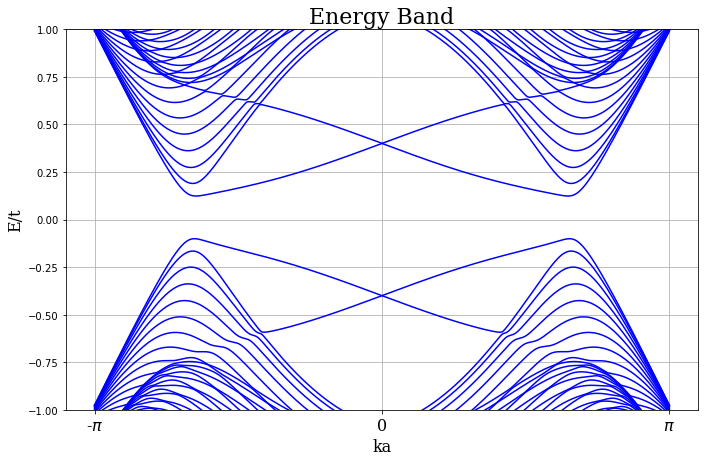

In [19]:
gr = (1+ np.sqrt(5))/2
# Make a plot of the energy band.
fig2 = plt.figure(figsize = (7*gr,7))
ax = fig2.gca()

for i in range(int(4*L)):
    ax.plot(plot_kpath, bandT[i], color="blue") 

ax.set_title("Energy Band", fontfamily = "serif", fontsize = 22)
ax.set_xlabel( "ka", fontfamily = "serif", fontsize = 16)
ax.set_ylabel("E/t", fontfamily = "serif", fontsize = 16)

ticks = [r"-$\pi$", r"0", r"$\pi$"]
ax.set_xticks([0, int(mesh/2), mesh])
ax.set_xticklabels(ticks, fontfamily = "serif", fontsize = 16)
ax.set_ylim(-1,1)
ax.grid(True)

In [20]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('Conducting.pdf')
pdf.savefig(fig1)
pdf.close()
pdf = PdfPages('Insulating.pdf')
pdf.savefig(fig2)
pdf.close()